In [1]:
%matplotlib inline
import csv
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

TRAIN_FILE_PATH = "data/X_train.csv"
TARGET_FILE_PATH =  "data/y_train.csv"
TEST_FILE_PATH = "data/X_test.csv"

In [20]:
#Load train and test set
print("\nTrain Data\n")

train_data = pd.read_csv(TRAIN_FILE_PATH)
train_data.drop(train_data.columns[0], axis=1, inplace=True)

Y_train = pd.read_csv(TARGET_FILE_PATH)
Y_train.drop(Y_train.columns[0], axis=1, inplace = True)

print("\nTest Data\n")

test_data =  pd.read_csv(TEST_FILE_PATH)
id_test = test_data.columns[0]
#test_data.drop(test_data.columns[0], axis=1, inplace=True)


Train Data


Test Data



In [3]:
# fill missing values with mean column values train and test set
def fill_NaN(train, test):
    print("Train shape: ", train.shape)
    print("Test shape: ",test.shape)
    train_mean_values = train.mean()
    train =  train.fillna(train_mean_values)
    test = test.fillna(train_mean_values)
    
    return train,test


In [4]:
train_data_mean, test_data_mean = fill_NaN(train_data, test_data)

Train shape:  (1212, 887)
Test shape:  (776, 887)


In [5]:
#Zero mean unit variance for train and test data
def scale_data(train, test):
    
    print("Train shape: ", train.shape)
    print("Test shape: ",test.shape)
    scaler = StandardScaler().fit(train, Y_train)
    #print(train_data_mean.shape)
    #print(test_data_mean.shape)
    train = scaler.transform(train)
    test = scaler.transform(test)
   
    return train, test

In [6]:
X_train_scaled, X_test_scaled = scale_data(train_data_mean, test_data_mean)

Train shape:  (1212, 887)
Test shape:  (776, 887)


(1212, 887)
(1212, 1)
[3.17463281e+02 3.09312060e+02 3.07583691e+02 2.85601310e+02
 2.78761802e+02 2.78148971e+02 2.73253960e+02 2.52760516e+02
 2.43972974e+02 2.43891857e+02 2.42925703e+02 2.38413283e+02
 2.00450421e+02 1.88501078e+02 1.87394892e+02 1.85534631e+02
 1.83031939e+02 1.77067457e+02 1.73985580e+02 1.72904968e+02
 1.63621244e+02 1.59121648e+02 1.58715436e+02 1.58235651e+02
 1.58076335e+02 1.54792017e+02 1.51246158e+02 1.50905309e+02
 1.50059132e+02 1.44974863e+02 1.41936780e+02 1.41853063e+02
 1.38327690e+02 1.37595239e+02 1.36981311e+02 1.33495247e+02
 1.29886104e+02 1.27973959e+02 1.27868471e+02 1.27800779e+02
 1.23643847e+02 1.21575634e+02 1.19960216e+02 1.17397751e+02
 1.16924717e+02 1.16108916e+02 1.15126528e+02 1.14374064e+02
 1.12846943e+02 1.11589434e+02 1.11331764e+02 1.09974839e+02
 1.08125510e+02 1.05072321e+02 1.01706441e+02 9.78253813e+01
 9.36728322e+01 9.31268014e+01 9.19324055e+01 8.80093999e+01
 8.72718824e+01 8.72661510e+01 8.71275443e+01 8.69762456e+01
 8

/home/francesco/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/francesco/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/home/francesco/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/francesco/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/francesco/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & 

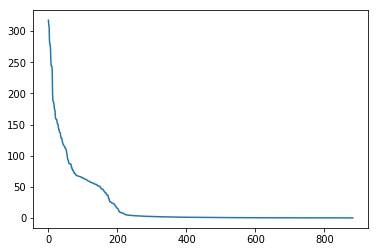

In [8]:
#Extract the features to use

n_features_fr = 150

print(X_train_scaled.shape)
print(Y_train.shape)
features_scores = f_regression(X_train_scaled,Y_train)[0]
#print(features_scores)
y = list(features_scores)
myarray = np.asarray(y)
print(-1*np.sort(-1*myarray))
#print(-1*np.sort(myarray-1))
plt.plot(-1*np.sort(-1*myarray))

indices_fr = myarray.argsort()[-n_features_fr:][::-1]
print(indices_fr)
print(len(indices_fr))



/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


building tree 1 of 50building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50

building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.6s


building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.0s finished


[2.28394970e-01 7.30731801e-02 4.26041065e-02 3.12476385e-02
 1.78416624e-02 1.43293849e-02 1.33050657e-02 1.08193317e-02
 1.07282115e-02 1.04330796e-02 9.81135699e-03 9.69823351e-03
 6.41281727e-03 6.07811729e-03 4.73579108e-03 4.57249844e-03
 4.56533185e-03 4.36602201e-03 4.11366518e-03 3.77652732e-03
 3.69093724e-03 3.44975713e-03 3.42902632e-03 3.33829596e-03
 3.21770449e-03 3.08304645e-03 3.06977910e-03 3.02269079e-03
 2.95235887e-03 2.84707023e-03 2.75106418e-03 2.58615638e-03
 2.54747034e-03 2.54616279e-03 2.53715935e-03 2.45018968e-03
 2.31774206e-03 2.31491715e-03 2.30882487e-03 2.30633847e-03
 2.29245116e-03 2.19278182e-03 2.08859299e-03 2.07879392e-03
 2.05089143e-03 2.04468112e-03 2.03494910e-03 1.98423878e-03
 1.93460860e-03 1.93037611e-03 1.89971061e-03 1.88055364e-03
 1.86348384e-03 1.86333520e-03 1.85306055e-03 1.84838101e-03
 1.83376812e-03 1.80648146e-03 1.73731289e-03 1.73325079e-03
 1.73187170e-03 1.73032809e-03 1.72938690e-03 1.72854430e-03
 1.71859803e-03 1.653908

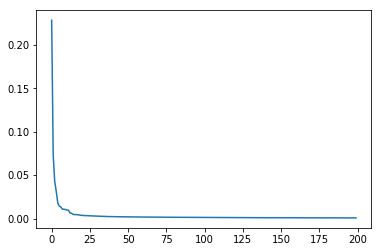

In [9]:
#Extract feature importance of Random Forest & find intersection with f_regression one

n_features_rf = 100

rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(X_train_scaled,Y_train)

scores = list(rf.feature_importances_)
my_rf_features = np.asarray(scores)
print(-1*np.sort(-1*my_rf_features))
#print(-1*np.sort(myarray-1))
plt.plot((-1*np.sort(-1*my_rf_features))[0:200])

indices_rf = my_rf_features.argsort()[-n_features_rf:][::-1]
print(indices_rf)
#print(-1*np.sort(-1*rf.feature_importances_));


In [10]:
# Find intersection between best f_regression features and random forest's

#print(set(indices_rf).intersection(indices_fr))

#indices = set(indices_rf).intersection(indices_fr)
indices = np.union1d(indices_rf, indices_fr)
print(indices)

[  0   5   7  12  18  20  28  32  39  42  52  60  66  80  82  83  85  88
  89  94  96 111 120 135 137 140 142 151 156 158 166 178 180 185 186 196
 198 201 205 209 224 229 232 234 237 238 250 251 266 269 273 275 277 291
 297 298 299 300 309 326 332 333 334 335 336 340 345 349 350 351 363 367
 369 370 371 372 374 388 391 398 400 410 424 426 428 430 450 457 460 470
 479 484 490 493 499 504 505 520 522 523 529 536 546 547 554 555 556 559
 560 591 599 604 605 607 608 609 611 613 615 618 632 633 634 636 637 638
 643 644 646 651 652 660 664 665 666 673 685 686 687 697 716 722 730 731
 735 736 739 741 744 746 750 751 752 763 772 781 787 791 792 794 795 800
 804 810 811 816 817 823 833 835 838 840 844 853 870 871 879 882]


In [11]:
#Extract the feature selected from dataset

#indices = indices_rf
#indices = indices_fr
indices = list(indices)

X_train_subset = train_data_mean[train_data_mean.columns[indices]]
X_test_subset = test_data_mean[train_data_mean.columns[indices]]

#print(X_subset.head(1))

X_train_subset, X_test_subset = fill_NaN(X_train_subset, X_test_subset)
X_train_subset, X_test_subset = scale_data(X_train_subset, X_test_subset)

print(X_train_subset.shape)

Train shape:  (1212, 178)
Test shape:  (776, 178)
Train shape:  (1212, 178)
Test shape:  (776, 178)
(1212, 178)


In [351]:
#model = MLPRegressor(batch_size = 200,validation_fraction=0.05, verbose=True, tol = 0.00000001,learning_rate_init=0.0001)

model = MLPRegressor(learning_rate='constant', 
                         hidden_layer_sizes=(50,30),
                         activation='logistic', 
                         learning_rate_init=0.01,
                         max_iter=15000, 
                         early_stopping =True,
                         validation_fraction=0.1,
                         tol=0.00000000001,
                         alpha=0.1,
                         #n_iter_no_change=100,
                         verbose=True)
model.fit(X_train_subset,Y_train)

#score = cross_val_score((model), X_train_subset, Y_train, scoring='r2', cv=4)
#print(score.mean())

/home/francesco/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 2448.78627045
Validation score: -52.883935
Iteration 2, loss = 2329.22285537
Validation score: -50.717433
Iteration 3, loss = 2239.08660436
Validation score: -48.813341
Iteration 4, loss = 2154.98609248
Validation score: -46.909513
Iteration 5, loss = 2069.01342318
Validation score: -44.904162
Iteration 6, loss = 1979.02136627
Validation score: -42.885823
Iteration 7, loss = 1890.36114840
Validation score: -40.929949
Iteration 8, loss = 1805.41792614
Validation score: -39.093777
Iteration 9, loss = 1725.44342513
Validation score: -37.338606
Iteration 10, loss = 1648.59083859
Validation score: -35.659618
Iteration 11, loss = 1575.50996297
Validation score: -34.046934
Iteration 12, loss = 1505.10203614
Validation score: -32.502340
Iteration 13, loss = 1437.64526734
Validation score: -30.998213
Iteration 14, loss = 1370.39596577
Validation score: -29.431636
Iteration 15, loss = 1301.13837053
Validation score: -27.923319
Iteration 16, loss = 1235.92809213
Validation sco

MLPRegressor(activation='logistic', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(50, 30), learning_rate='constant',
       learning_rate_init=0.01, max_iter=15000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=1e-11, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [21]:
#y_pred = model.predict(X_test_subset)
test_data["y"] = predictions
#print(y_pred)

In [22]:
# create submission
test_data[["id", "y"]].to_csv("submissions/keras_deep_dropout_regul.csv", index= False)

In [208]:
y_pred = model.predict(X_train_subset)
from sklearn.metrics import r2_score
score = r2_score(Y, y_pred)
print(score)

0.47870539796991196


In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers
# fix random seed for reproducibility

def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

Y = Y_train
dropout = 0.1
#print(Y)
# create model
model = Sequential()
model.add(Dense(30, input_dim=178, kernel_regularizer = regularizers.l2(1), init='RandomUniform'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(30, input_dim=72, kernel_regularizer = regularizers.l2(1), init='RandomUniform'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(30, input_dim=72, kernel_regularizer = regularizers.l2(1), init='RandomUniform'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(30, input_dim=72, kernel_regularizer = regularizers.l2(1), init='RandomUniform'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(30, input_dim=72, kernel_regularizer = regularizers.l2(1), init='RandomUniform'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(30, input_dim=72, kernel_regularizer = regularizers.l2(1), init='RandomUniform'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(30, input_dim=72, kernel_regularizer = regularizers.l2(1), init='RandomUniform'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))
model.add(Dense(30, input_dim=72, kernel_regularizer = regularizers.l2(1), init='RandomUniform'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(rate = dropout))

model.add(Dense(1, init='RandomUniform'))
# Compile model
optimizer = Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=[coeff_determination])
# Fit the model
model.fit(x=X_train_subset, y=Y, epochs=80, verbose=2, validation_split=0.1, shuffle=True, steps_per_epoch=50, initial_epoch=0, validation_steps=5)
# calculate predictions
print(X_test_subset)
predictions = model.predict(X_test_subset)
# round predictions
#ages = [x*100 for x in predictions]
#predictions = predictions*100
print(predictions)

/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=178, kernel_regularizer=<keras.reg..., kernel_initializer="RandomUniform")`
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=72, kernel_regularizer=<keras.reg..., kernel_initializer="RandomUniform")`
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=72, kernel_regularizer=<keras.reg..., kernel_initializer="RandomUniform")`
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=72, kernel_regularizer=<keras.reg..., kernel_initializer="RandomUniform")`
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel

Train on 1090 samples, validate on 122 samples
Epoch 1/80
 - 2s - loss: 3875.2985 - coeff_determination: -3.7919e+01 - val_loss: 219.7609 - val_coeff_determination: -6.5776e-01
Epoch 2/80
 - 0s - loss: 303.4930 - coeff_determination: -1.4598e+00 - val_loss: 100.2047 - val_coeff_determination: 0.5318
Epoch 3/80
 - 0s - loss: 244.1433 - coeff_determination: -9.3584e-01 - val_loss: 86.0929 - val_coeff_determination: 0.6224
Epoch 4/80
 - 0s - loss: 223.5158 - coeff_determination: -7.6545e-01 - val_loss: 81.5962 - val_coeff_determination: 0.6380
Epoch 5/80
 - 0s - loss: 211.0848 - coeff_determination: -6.7211e-01 - val_loss: 89.8660 - val_coeff_determination: 0.5202
Epoch 6/80
 - 0s - loss: 202.0537 - coeff_determination: -6.0246e-01 - val_loss: 80.9346 - val_coeff_determination: 0.5952
Epoch 7/80
 - 0s - loss: 195.0695 - coeff_determination: -5.4764e-01 - val_loss: 76.7336 - val_coeff_determination: 0.6270
Epoch 8/80
 - 0s - loss: 186.7333 - coeff_determination: -4.7632e-01 - val_loss: 76.

Epoch 70/80
 - 0s - loss: 65.6819 - coeff_determination: 0.5274 - val_loss: 51.0549 - val_coeff_determination: 0.6633
Epoch 71/80
 - 0s - loss: 64.0721 - coeff_determination: 0.5430 - val_loss: 57.6074 - val_coeff_determination: 0.5932
Epoch 72/80
 - 0s - loss: 63.6700 - coeff_determination: 0.5454 - val_loss: 47.7967 - val_coeff_determination: 0.6952
Epoch 73/80
 - 0s - loss: 64.8793 - coeff_determination: 0.5320 - val_loss: 60.5893 - val_coeff_determination: 0.5600
Epoch 74/80
 - 0s - loss: 63.8529 - coeff_determination: 0.5424 - val_loss: 49.8999 - val_coeff_determination: 0.6723
Epoch 75/80
 - 0s - loss: 62.7783 - coeff_determination: 0.5527 - val_loss: 64.9229 - val_coeff_determination: 0.5129
Epoch 76/80
 - 0s - loss: 63.5979 - coeff_determination: 0.5434 - val_loss: 48.8776 - val_coeff_determination: 0.6808
Epoch 77/80
 - 0s - loss: 63.0314 - coeff_determination: 0.5494 - val_loss: 51.0272 - val_coeff_determination: 0.6564
Epoch 78/80
 - 0s - loss: 62.7038 - coeff_determination: